# Supervised Learning

In [1]:
suppressPackageStartupMessages(library(tidyverse))

In [2]:
options(repr.plot.width=4, repr.plot.height=4)

## Regression

In [3]:
set.seed(10)

x <- 1:10 
y = x + rnorm(10, 0.5, 1)

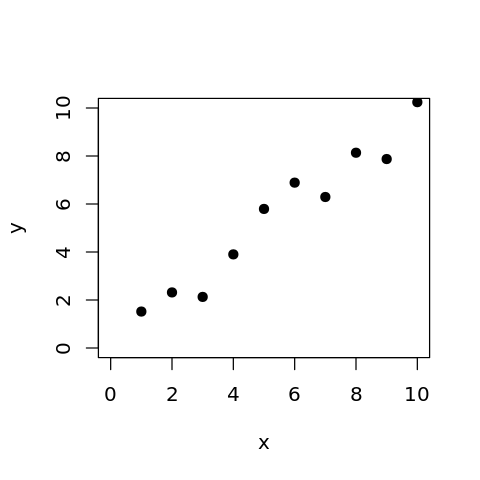

In [4]:
plot(x, y, xlim = c(0, 10), ylim = c(0, 10), pch = 19)

#### Detour: Image formatting in base graphics

![Point characters](http://www.statmethods.net/advgraphs/images/points.png)

### Linear Regression

In [5]:
model.lm <- lm(y ~ x) 

#### Predicting from a fitted model

In [6]:
predict(model.lm)

1        2        3        4        5        6        7        8 
1.262084 2.205919 3.149755 4.093590 5.037425 5.981261 6.925096 7.868932 
       9       10 
8.812767 9.756602

#### Predicting for new data

In [7]:
predict(model.lm, data.frame(x = c(1.5, 3.5, 5.5)))

1        2        3 
1.734002 3.621672 5.509343

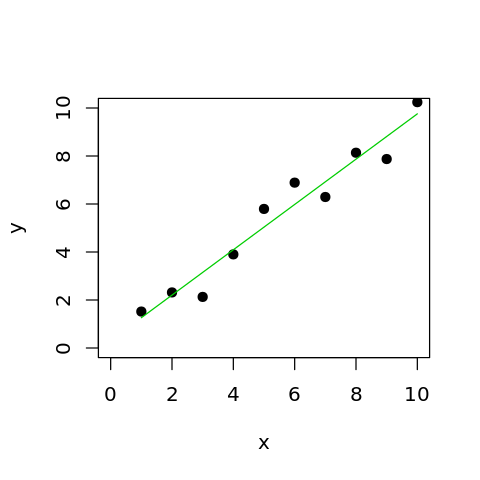

In [8]:
plot(x, y, xlim = c(0, 10), ylim = c(0, 10), pch = 19)
lines(x, predict(model.lm), col = 3)

#### Alternative

Note that `abline` plots the fitted line throughout the plot limits for the x-axis.

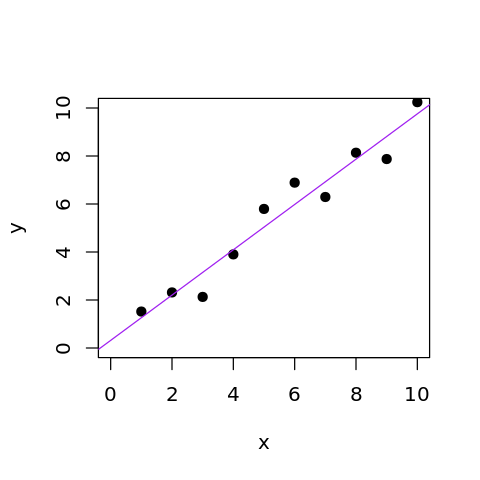

In [9]:
plot(x, y, xlim = c(0, 10), ylim = c(0, 10), pch = 19)
abline(model.lm, col="purple")

#### Detour: Colors in base graphics

![Colors](http://www.statmethods.net/advgraphs/images/colorchart.png)

You can also used named colors - run `colors` to get all named colors available.

In [10]:
colors()

[1] "white"                "aliceblue"            "antiquewhite"        
  [4] "antiquewhite1"        "antiquewhite2"        "antiquewhite3"       
  [7] "antiquewhite4"        "aquamarine"           "aquamarine1"         
 [10] "aquamarine2"          "aquamarine3"          "aquamarine4"         
 [13] "azure"                "azure1"               "azure2"              
 [16] "azure3"               "azure4"               "beige"               
 [19] "bisque"               "bisque1"              "bisque2"             
 [22] "bisque3"              "bisque4"              "black"               
 [25] "blanchedalmond"       "blue"                 "blue1"               
 [28] "blue2"                "blue3"                "blue4"               
 [31] "blueviolet"           "brown"                "brown1"              
 [34] "brown2"               "brown3"               "brown4"              
 [37] "burlywood"            "burlywood1"           "burlywood2"          
 [40] "burlywood3"           "burlywood4"           "cadetblue"           
 [43] "cadetblue1"           "cadetblue2"           "cadetblue3"          
 [46] "cadetblue4"           "chartreuse"           "chartreuse1"         
 [49] "chartreuse2"          "chartreuse3"          "chartreuse4"         
 [52] "chocolate"            "chocolate1"           "chocolate2"          
 [55] "chocolate3"           "chocolate4"           "coral"               
 [58] "coral1"               "coral2"               "coral3"              
 [61] "coral4"               "cornflowerblue"       "cornsilk"            
 [64] "cornsilk1"            "cornsilk2"            "cornsilk3"           
 [67] "cornsilk4"            "cyan"                 "cyan1"               
 [70] "cyan2"                "cyan3"                "cyan4"               
 [73] "darkblue"             "darkcyan"             "darkgoldenrod"       
 [76] "darkgoldenrod1"       "darkgoldenrod2"       "darkgoldenrod3"      
 [79] "darkgoldenrod4"       "darkgray"             "darkgreen"           
 [82] "darkgrey"             "darkkhaki"            "darkmagenta"         
 [85] "darkolivegreen"       "darkolivegreen1"      "darkolivegreen2"     
 [88] "darkolivegreen3"      "darkolivegreen4"      "darkorange"          
 [91] "darkorange1"          "darkorange2"          "darkorange3"         
 [94] "darkorange4"          "darkorchid"           "darkorchid1"         
 [97] "darkorchid2"          "darkorchid3"          "darkorchid4"         
[100] "darkred"              "darksalmon"           "darkseagreen"        
[103] "darkseagreen1"        "darkseagreen2"        "darkseagreen3"       
[106] "darkseagreen4"        "darkslateblue"        "darkslategray"       
[109] "darkslategray1"       "darkslategray2"       "darkslategray3"      
[112] "darkslategray4"       "darkslategrey"        "darkturquoise"       
[115] "darkviolet"           "deeppink"             "deeppink1"           
[118] "deeppink2"            "deeppink3"            "deeppink4"           
[121] "deepskyblue"          "deepskyblue1"         "deepskyblue2"        
[124] "deepskyblue3"         "deepskyblue4"         "dimgray"             
[127] "dimgrey"              "dodgerblue"           "dodgerblue1"         
[130] "dodgerblue2"          "dodgerblue3"          "dodgerblue4"         
[133] "firebrick"            "firebrick1"           "firebrick2"          
[136] "firebrick3"           "firebrick4"           "floralwhite"         
[139] "forestgreen"          "gainsboro"            "ghostwhite"          
[142] "gold"                 "gold1"                "gold2"               
[145] "gold3"                "gold4"                "goldenrod"           
[148] "goldenrod1"           "goldenrod2"           "goldenrod3"          
[151] "goldenrod4"           "gray"                 "gray0"               
[154] "gray1"                "gray2"                "gray3"               
[157] "gray4"                "gray5"                "gray6"               
[160] "gray7"              

### Polynomial Regression

In [11]:
model.poly5 <- lm(y ~ poly(x, 5))

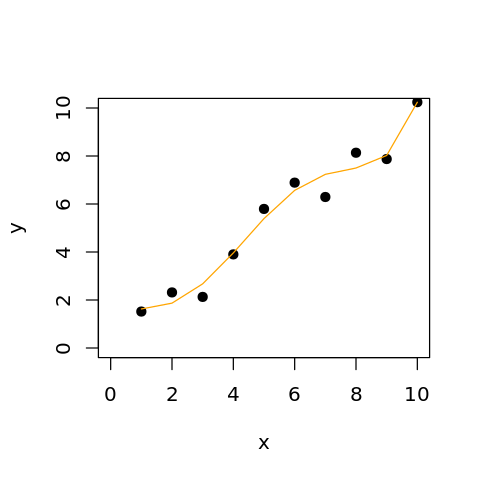

In [12]:
plot(x, y, xlim = c(0, 10), ylim = c(0, 10), pch = 19)
lines(x, predict(model.poly5), col = "orange")

### Spline Regression

Splines are essentially piecewise polynomial fits. There are two parameters

- degree determines the type of piecewise polynomials used (e.g. degree=3 uses cubic polynomials)
- knots are where the piecewise polynomials meet (determine number of pieces)

In [13]:
library(splines)

In [14]:
model.spl <- lm(y ~ bs(x, degree=3, knots=4))

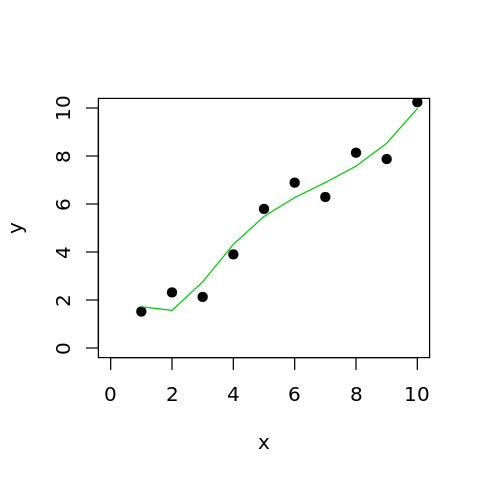

In [15]:
plot(x, y, xlim = c(0, 10), ylim = c(0, 10), pch = 19)
lines(x, predict(model.spl), col = 3)

### Connect the dots

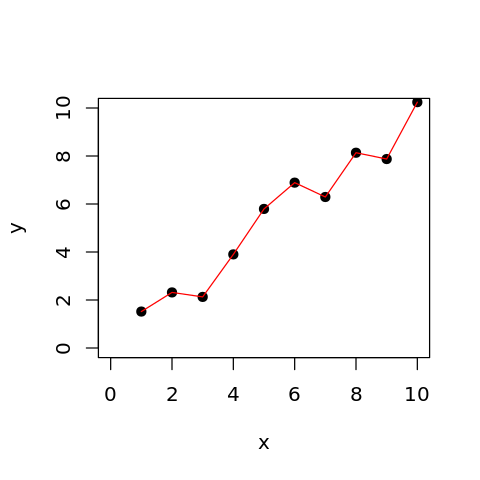

In [16]:
plot(x, y, xlim = c(0, 10), ylim = c(0, 10), pch = 19)
lines(x, y, col="red")

## Classification

In [17]:
levels(iris$Species)

[1] "setosa"     "versicolor" "virginica"

### Can we separate two species of iris?

In [18]:
df <- iris %>% filter(Species != "setosa")
df$Species <- droplevels(df$Species)

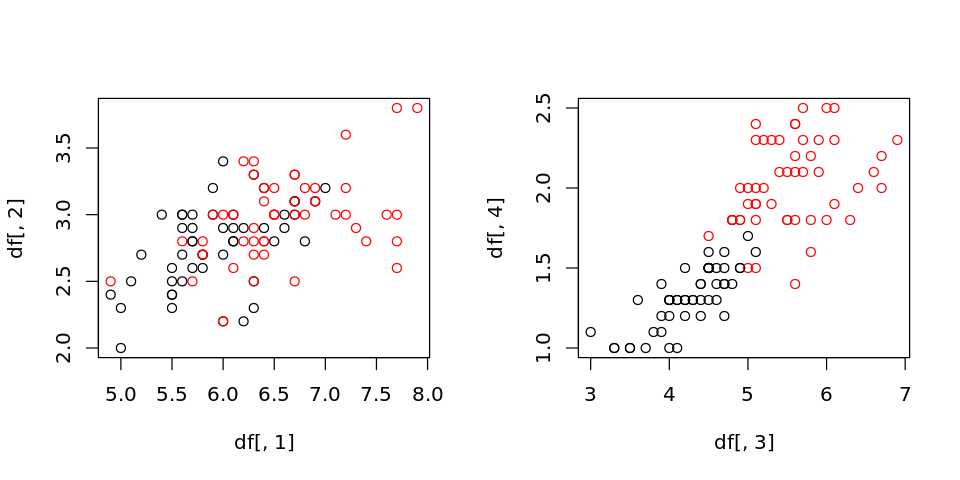

In [19]:
options(repr.plot.width=8, repr.plot.height=4)
par(mfrow=c(1,2))
plot(df[,1], df[,2], col=as.integer(df$Species))
plot(df[,3], df[,4], col=as.integer(df$Species))

In [20]:
sample.int(10, 5)

[1] 9 6 7 3 8

#### Split into 50% training and 50% test sets

In [21]:
library(class)

In [22]:
set.seed(10) 
sample <- sample.int(n = nrow(df), size = floor(.5*nrow(df)), replace = F)
train <- df[sample, 1:4]
test  <- df[-sample, 1:4]
train.cls = df$Species[sample]
test.cls = df$Species[-sample]

In [23]:
test.pred <- knn(train, test, train.cls, k = 3)

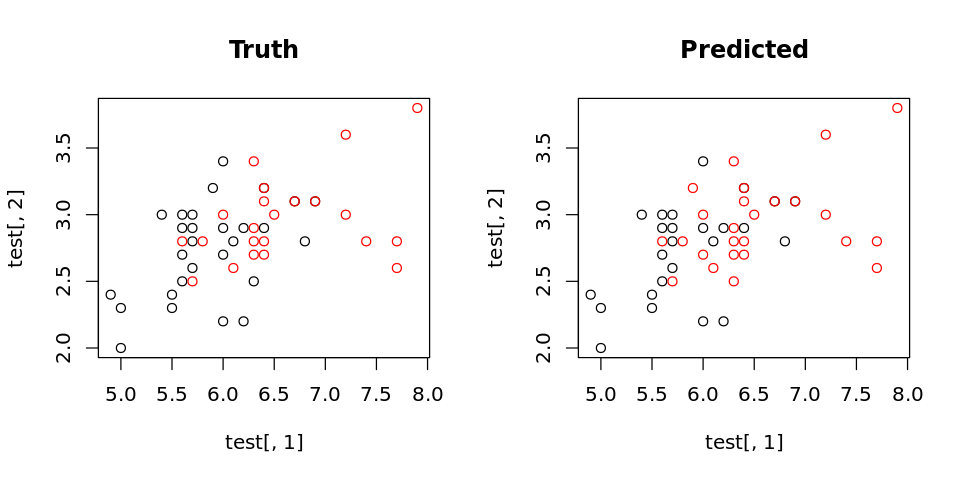

In [24]:
options(repr.plot.width=8, repr.plot.height=4)
par(mfrow=c(1,2))
plot(test[,1], test[,2], col=as.integer(test.cls), main="Truth")
plot(test[,1], test[,2], col=as.integer(test.pred), main="Predicted")

In [25]:
table(test.pred, test.cls)

            test.cls
test.pred    versicolor virginica
  versicolor         25         0
  virginica           3        22

### Logistic Regression

In [26]:
head(train)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
51,6.3,3.3,6.0,2.5
31,5.5,2.4,3.8,1.1
42,6.1,3.0,4.6,1.4
68,7.7,3.8,6.7,2.2
9,6.6,2.9,4.6,1.3
22,6.1,2.8,4.0,1.3


The warning is due to the fact that vanilla logistic regression does not like perfectly separated data sets. The usual remedy is to add a penalization factor.

In [27]:
model.logistic <- glm(train.cls ~ .,
                      family=binomial(link='logit'), data=train)

Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [28]:
summary(model.logistic)


Call:
glm(formula = train.cls ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-2.347e-05  -2.110e-08   2.110e-08   2.110e-08   2.792e-05  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)
(Intercept)   1.658e+00  1.263e+06   0.000    1.000
Sepal.Length -6.152e+01  9.061e+04  -0.001    0.999
Sepal.Width  -8.214e+01  4.829e+05   0.000    1.000
Petal.Length  7.759e+01  1.673e+05   0.000    1.000
Petal.Width   1.453e+02  2.148e+05   0.001    0.999

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6.8593e+01  on 49  degrees of freedom
Residual deviance: 2.0984e-09  on 45  degrees of freedom
AIC: 10

Number of Fisher Scoring iterations: 25


In [29]:
test.pred <- ifelse(predict(model.logistic, test) < 0, 1, 2)

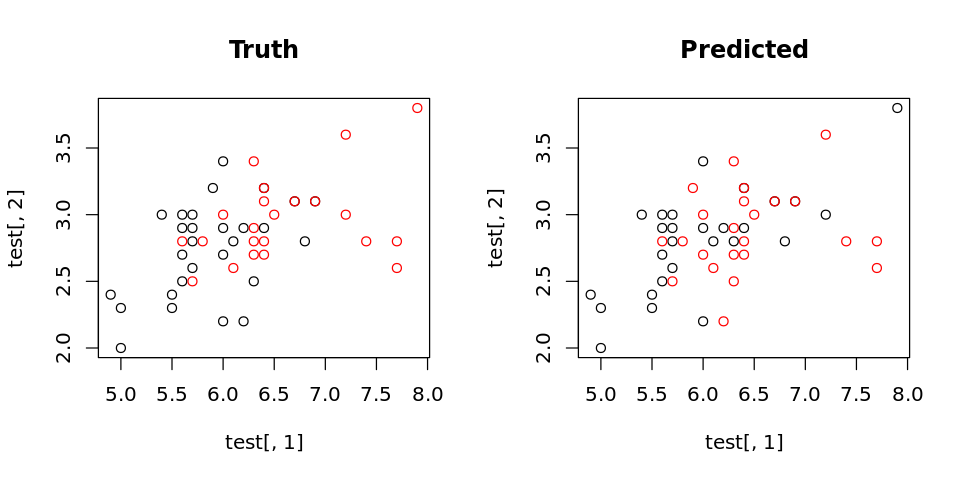

In [30]:
options(repr.plot.width=8, repr.plot.height=4)
par(mfrow=c(1,2))
plot(test[,1], test[,2], col=as.integer(test.cls), main="Truth")
plot(test[,1], test[,2], col=test.pred, main="Predicted")

In [31]:
table(test.pred, test.cls)

         test.cls
test.pred versicolor virginica
        1         24         3
        2          4        19

## Overfitting

In [32]:
set.seed(10)

x <- 1:10 
y = 0.1*x^2 + 0.2*x + rnorm(10, 0.5, 1)

In [33]:
m1 <- lm(y ~ x)
m2 <- lm(y ~ poly(x, 2))
m5 <- lm(y ~ poly(x, 5))
m9 <- lm(y ~ poly(x, 9))

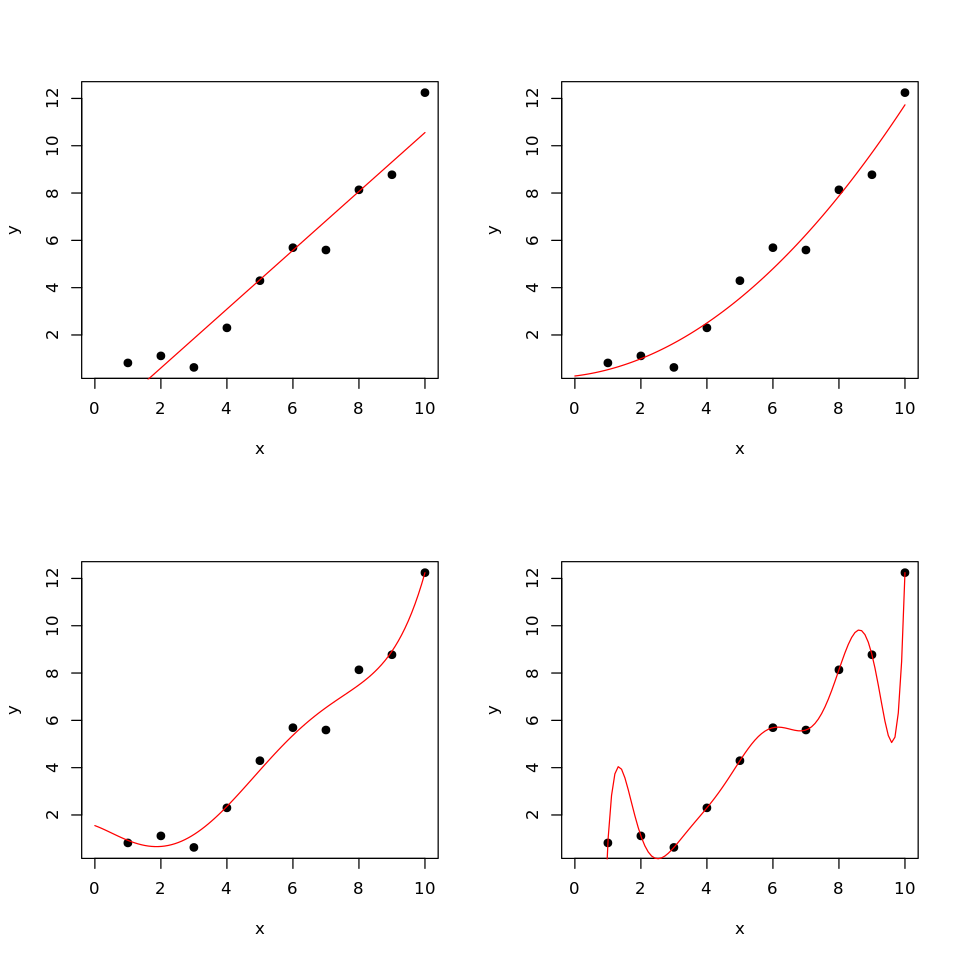

In [34]:
options(repr.plot.width=8, repr.plot.height=8)

xp = seq(0, 10, length.out = 100)
df <- data.frame(x=xp)

par(mfrow=c(2,2))
plot(x, y, xlim = c(0, 10), pch = 19)
lines(xp, predict(m1, df), col = "red")
plot(x, y, xlim = c(0, 10), pch = 19)
lines(xp, predict(m2, df), col = "red")
plot(x, y, xlim = c(0, 10), pch = 19)
lines(xp, predict(m5, df), col = "red")
plot(x, y, xlim = c(0, 10), pch = 19)
lines(xp, predict(m9, df), col = "red")

### Evaluate model RSS using `in-sample` testing (Error resubstitution)

In [35]:
for (model in list(m1, m2, m5, m9)) {
    print(round(sum((predict(model, data.frame(x=x)) - y)^2), 2))
    }

[1] 9.18
[1] 4.15
[1] 2.09
[1] 0


### Evaluate model RSS using `out-of-sample` testing

In [36]:
test.x <- runif(10, 0, 10)
test.y <- 0.1*test.x^2 + 0.2*test.x + rnorm(10, 0.5, 3)

In [37]:
for (model in list(m1, m2, m5, m9)) {
    print(round(sum((predict(model, data.frame(x=test.x)) - test.y)^2), 2))
    }

[1] 112.25
[1] 103.79
[1] 99.8
[1] 111.98


## Cross-validation

In [38]:
for (k in 1:5) {
    rss <- 0
    for (i in 1:10) {
        xmo <- x[-i]
        ymo <- y[-i]
        model <- lm(ymo ~ poly(xmo, k))
        res <- (predict(model, data.frame(xmo=x[i])) - y[i])^2
        rss <- rss + res
    }
    print(k)
    print(rss)
}                          
                           

[1] 1
       1 
17.61035 
[1] 2
      1 
8.68587 
[1] 3
       1 
19.42014 
[1] 4
       1 
20.58078 
[1] 5
       1 
50.26568 


## Feature Selection

In [39]:
suppressPackageStartupMessages(library(genefilter))

In [40]:
set.seed(123)
n = 20
m = 1000
EXPRS = matrix(rnorm(2 * n * m), 2 * n, m) 
rownames(EXPRS) = paste("pt", 1:(2 * n), sep = "") 
colnames(EXPRS) = paste("g", 1:m, sep = "")
grp = as.factor(rep(1:2, c(n, n)))

In [41]:
head(EXPRS, 3)

,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,⋯,g991,g992,g993,g994,g995,g996,g997,g998,g999,g1000
pt1,-0.5604756,-0.6947070,0.005764186,0.1176466,1.052711,2.1988103,-0.7886220,-1.6674751,0.2374303,-0.2052993,⋯,0.3780725,1.974814,-0.4535280,-0.4552866,-2.3004639,-0.3804398,0.2870161,-0.2018602,-1.6727583,1.1379048
pt2,-0.2301775,-0.2079173,0.385280401,-0.9474746,-1.049177,1.3124130,-0.5021987,0.7364960,1.2181086,0.6511933,⋯,0.5981352,-1.021826,-2.0371182,1.5636880,-0.9501855,0.6671640,-0.6702249,1.1181721,-0.5414325,1.2684239
pt3,1.5587083,-1.2653964,-0.370660032,-0.4905574,-1.260155,-0.2651451,1.4960607,0.3860266,-1.3387743,0.2737665,⋯,0.5774870,0.853561,-0.3030158,-0.1434414,-0.8478627,0.2413405,-0.5417177,0.1625707,0.1995339,0.0427062


In [42]:
stats = abs(rowttests(t(EXPRS), grp)$statistic) 

In [43]:
head(stats,3)

[1] 0.6746243 0.7417175 3.0254227

In [44]:
ii <- order(-stats)

In [45]:
TOPEXPRS <- EXPRS[, ii[1:10]]

### Error Resubstitution (In-sample error)

In [46]:
mod0 = knn(train = TOPEXPRS, test = TOPEXPRS, cl = grp, k = 3) 
table(mod0, grp)

    grp
mod0  1  2
   1 17  0
   2  3 20

### Optimistic Cross-validated predictions

Note: Feature selection is not part of the CV process, and so the results are OVER-OPTIMISTIC

In [47]:
mode1 = knn.cv(TOPEXPRS, grp, k = 3) 
table(mode1, grp)

     grp
mode1  1  2
    1 16  0
    2  4 20

### Cross-validation done right (fancy version)

In [48]:
suppressPackageStartupMessages(library(multtest))

In [49]:
top.features <- function(EXP, resp, test, fsnum) {
     top.features.i <- function(i, EXP, resp, test, fsnum) {
         stats <- abs(mt.teststat(EXP[, -i], resp[-i], test = test)) 
         ii <- order(-stats)[1:fsnum]
         rownames(EXP)[ii]
    }
    sapply(1:ncol(EXP), top.features.i, 
           EXP = EXP, resp = resp, test = test, fsnum = fsnum)
}

In [50]:
# This function evaluates the knn
knn.loocv <- function(EXP, resp, test, k, fsnum, tabulate = FALSE, permute = FALSE) {
    if (permute) {
        resp = sample(resp)
        }
    topfeat = top.features(EXP, resp, test, fsnum) 
    pids = rownames(EXP)
    EXP = t(EXP)
    colnames(EXP) = as.character(pids)
    knn.loocv.i = function(i, EXP, resp, k, topfeat) {
    ii = topfeat[, i]
    mod = knn(train = EXP[-i, ii], test = EXP[i, ii], cl = resp[-i], k = k)[1] }
    out = sapply(1:nrow(EXP), knn.loocv.i, 
                 EXP = EXP, resp = resp, k
                 = k, topfeat = topfeat) 
    if (tabulate)
        out = ftable(pred = out, obs = resp) 
    return(out)
}

#### Reminder of what the data look like

In [51]:
EXPRS[1:5, 1:5]

,g1,g2,g3,g4,g5
pt1,-0.56047565,-0.6947070,0.005764186,0.1176466,1.0527115
pt2,-0.23017749,-0.2079173,0.385280401,-0.9474746,-1.0491770
pt3,1.55870831,-1.2653964,-0.370660032,-0.4905574,-1.2601552
pt4,0.07050839,2.1689560,0.644376549,-0.2560922,3.2410399
pt5,0.12928774,1.2079620,-0.220486562,1.8438620,-0.4168576


In [52]:
levels(grp)

[1] "1" "2"

In [53]:
knn.loocv(t(EXPRS), grp, "t.equalvar", 3, 10, TRUE)

     obs  1  2
pred          
1         7  7
2        13 13

### Cross-validation done right (simple version)

In [54]:
pred <- numeric(2*n)
for (i in 1:(2*n)) {
    stats = abs(rowttests(t(EXPRS[-i,]), grp[-i])$statistic) 
    ii <- order(-stats)
    TOPEXPRS <- EXPRS[-i, ii[1:10]]
    pred[i] = knn(TOPEXPRS, EXPRS[i, ii[1:10]], grp[-i], k = 3) 
}

In [55]:
table(pred, grp)

    grp
pred  1  2
   1  7  7
   2 13 13

## Exercise

-  Repeat the last experiment with a noisy quantitative outcome
-  First simulate a data matrix of dimension n = 50 (patients) and m (genes)
-  Next draw the outcome for n=50 patients from a standard normal distribution independent of the data matrix
-  There is no relationship between the expressions and the outcome (by design)
-  We consider m=45 and m=50000
-  We conduct Naive LOOCV using the top 10 features

#### Data Generation

In [56]:
set.seed(123)
n <- 50
m <- 50000
EXPRS <- matrix(rnorm(n*m), n, m)
rownames(EXPRS) = paste("pt", 1:n, sep = "") 
colnames(EXPRS) = paste("g", 1:m, sep = "")
OUTCOMES <- rnorm(n)

#### Proper cross-validation

In [57]:
pred0 <- numeric(n)
for (i in 1:n) {
    
    stats <- abs(cor(OUTCOMES[-i], EXPRS[-i,]))
    ii <- order(-stats)
    TOPEXPRS <- EXPRS[, ii[1:10]]
    
    data <- data.frame(y = OUTCOMES, x = I(TOPEXPRS))
    model <- lm(y ~ x, data=data[-i,])
    pred0[i] <- predict(model, data[i,])
}

#### Naive cross-validation

In [58]:
stats <- abs(cor(OUTCOMES, EXPRS))
ii <- order(-stats)
TOPEXPRS <- EXPRS[, ii[1:10]]

In [59]:
pred <- numeric(n)
for (i in 1:n) {
    data <- data.frame(y = OUTCOMES, x = I(TOPEXPRS))
    model <- lm(y ~ x, data=data[-i,])
    pred[i] <- predict(model, data[i,])
}

ERROR: Error in xy.coords(x, y): object 'pred.0' not found


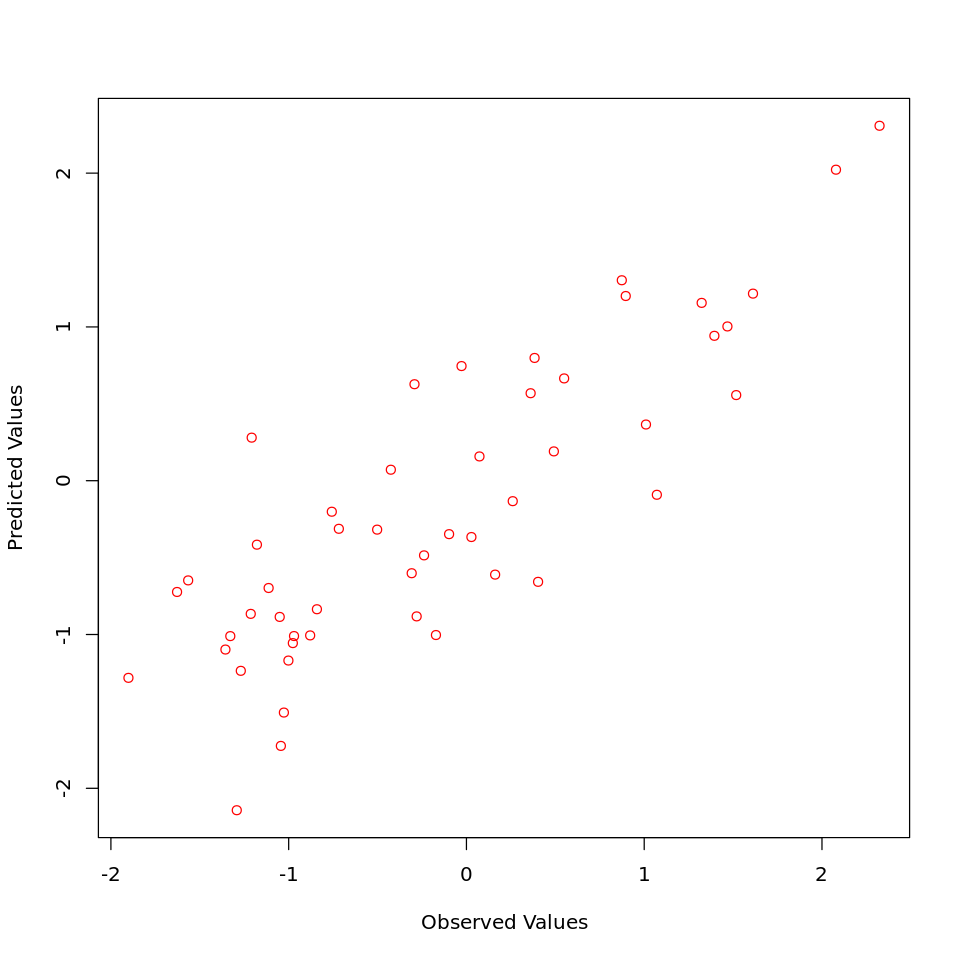

In [60]:
plot(OUTCOMES, pred, col='red', xlab="Observed Values", ylab="Predicted Values")
points(OUTCOMES, pred.0, pch=4, col='blue')
abline(lm(pred ~ OUTCOMES), col='red')